## Tarea 3

### Puntos a considerar que se desempeñaran en el análisis
- Aplica algún método de filtro a tus datos mediante el uso de SelectKBest  
- Aplica los modelos de selección de características cuidando los supuestos de cada modelo
- Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)
- Con base en tu investigación, determina las características más relevantes de tu conjunto de datos
- Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

Leer df y verificar datos

In [274]:
import pandas as pd
df = pd.read_csv('C:/Users/AranzaEstebanAvalos/Documents/df2_loan.csv',low_memory=False)
df_head = df.head()
df_info = df.info()
df_head

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804578 entries, 0 to 804577
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10101 non-null  float64
 1   loan_amnt           10101 non-null  float64
 2   funded_amnt         10101 non-null  float64
 3   term                10101 non-null  float64
 4   int_rate            10101 non-null  float64
 5   installment         10101 non-null  float64
 6   grade               10101 non-null  float64
 7   sub_grade           10101 non-null  float64
 8   emp_length          10101 non-null  float64
 9   home_ownership      10101 non-null  float64
 10  annual_inc          10101 non-null  float64
 11  purpose             10101 non-null  float64
 12  addr_state          10101 non-null  float64
 13  earliest_cr_line    10101 non-null  object 
 14  open_acc            10101 non-null  float64
 15  total_pymnt_inv     10101 non-null  float64
 16  to

In [275]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Limpieza de Datos
# Eliminar filas donde la columna objetivo es NaN
df_clean = data.dropna(subset=['loan_amnt'])

In [276]:
# Conversión de Fechas
date_columns = ['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_columns:
    df_clean[col] = pd.to_datetime(df_clean[col])
    df_clean[col] = (df_clean[col] - pd.Timestamp('1970-01-01')).dt.days

In [277]:
# Codificación de Variables Categóricas

categorias_columns = df_clean.select_dtypes(include=['object']).columns

# Aplicar codificación One-Hot con el fin de identificar categorías unicas: 
encoder = OneHotEncoder(sparse=False)
categorias_encoded = encoder.fit_transform(df_clean[categorias_columns])

categorias_df = pd.DataFrame(categorias_encoded, index=df_clean.index, columns=encoder.get_feature_names_out(categorias_columns))


In [278]:
# Identificar valores únicos
default_values = df['default_ind'].dropna().unique()
print(default_values)

df_clean = df.dropna(subset=['loan_amnt'])
# Separar la variable objetivo y el conjunto de características
y = df_clean['loan_amnt']
X = df_clean.drop(columns=['loan_amnt', 'id'])

[11322.  5267.  5174. ... 15827.  6698. 11930.]


In [279]:
X = X.drop(['funded_amnt'], axis=1)

In [280]:
X.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,...,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,default_ind,loanVSfunded,sub_grade_encoded,credit_history
0,36.0,10.65,162.87,1.0,6.0,10.0,5.0,24000.0,1.0,3.0,...,5831.78,861.07,01/01/2015,171.62,01/01/2016,0.0,11322.0,0.0,6.0,11322.0
1,60.0,15.27,59.83,2.0,13.0,0.0,5.0,30000.0,0.0,10.0,...,1008.71,435.17,01/04/2013,119.66,01/09/2013,0.0,5267.0,0.0,13.0,5267.0
2,36.0,15.96,84.33,2.0,14.0,10.0,5.0,12252.0,11.0,14.0,...,3003.65,603.65,01/06/2014,649.91,01/01/2016,0.0,5174.0,0.0,14.0,5174.0
3,36.0,13.49,339.31,2.0,10.0,10.0,5.0,49200.0,9.0,4.0,...,12226.30,2209.33,01/01/2015,357.48,01/01/2015,0.0,6909.0,0.0,10.0,6909.0
4,60.0,12.69,67.79,1.0,9.0,1.0,5.0,80000.0,9.0,37.0,...,3242.17,1009.07,01/01/2016,67.79,01/01/2016,0.0,7305.0,0.0,9.0,7305.0


In [281]:
X_numeric = X

In [282]:
# Convertir las columnas de tipo objeto a formato numérico
date_columns = ['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

for col in date_columns:
    X[col] = pd.to_datetime(X[col], errors='coerce')
    X[col] = (X[col] - pd.Timestamp('1970-01-01')).dt.days
X = X.fillna(-1)
X.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,...,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,default_ind,loanVSfunded,sub_grade_encoded,credit_history
0,36.0,10.65,162.87,1.0,6.0,10.0,5.0,24000.0,1.0,3.0,...,5831.78,861.07,16436,171.62,16801,0.0,11322.0,0.0,6.0,11322.0
1,60.0,15.27,59.83,2.0,13.0,0.0,5.0,30000.0,0.0,10.0,...,1008.71,435.17,15709,119.66,15714,0.0,5267.0,0.0,13.0,5267.0
2,36.0,15.96,84.33,2.0,14.0,10.0,5.0,12252.0,11.0,14.0,...,3003.65,603.65,16076,649.91,16801,0.0,5174.0,0.0,14.0,5174.0
3,36.0,13.49,339.31,2.0,10.0,10.0,5.0,49200.0,9.0,4.0,...,12226.30,2209.33,16436,357.48,16436,0.0,6909.0,0.0,10.0,6909.0
4,60.0,12.69,67.79,1.0,9.0,1.0,5.0,80000.0,9.0,37.0,...,3242.17,1009.07,16801,67.79,16801,0.0,7305.0,0.0,9.0,7305.0


Aplicar metodo de filtro

In [283]:
k = 10
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Obtener los índices de las características seleccionadas
selected_indices = selector.get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_features_names = X.columns[selected_indices]

print(selected_features_names)

Index(['term', 'int_rate', 'installment', 'sub_grade', 'annual_inc',
       'total_pymnt_inv', 'total_rec_int', 'last_pymnt_amnt', 'loanVSfunded',
       'sub_grade_encoded'],
      dtype='object')


#### F_regression

Obtener las 15 características más relevantes para predecir el monto del préstamo \
Mide la correlación lineal entre cada característica y la variable objetivo. Es útil para detectar relaciones lineales pero no captura relaciones no lineales o interacciones entre características.

In [284]:
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionar las 15 mejores características
selector = SelectKBest(f_regression, k=15)
X_nuevo = selector.fit_transform(X, y)

# Caracteristicas  seleccionadas y score
columnas = X.columns[selector.get_support()]
score = selector.scores_[selector.get_support()]

columnas_score = pd.DataFrame({'Columna': columnas, 'Score': score}).sort_values(by='Score', ascending=False)

columnas_score.sort_values(by = 'Score', ascending=False)


,Columna,Score
2,installment,77071.986985
8,total_pymnt_inv,37938.163310
9,total_rec_int,11573.916538
0,term,3132.836389
10,last_pymnt_amnt,2600.952934
5,annual_inc,1655.671414
13,sub_grade_encoded,1283.991015
3,sub_grade,1283.991015
1,int_rate,1201.441424
12,loanVSfunded,631.248277


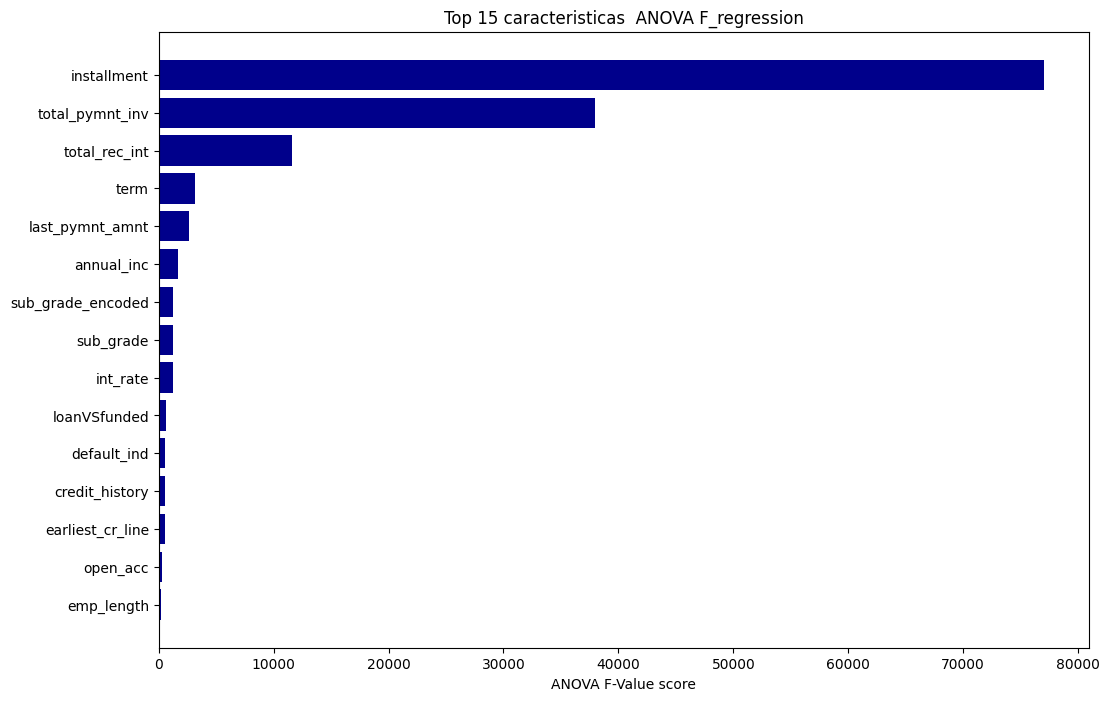

In [285]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(columnas_score['Columna'], columnas_score['Score'], color='darkblue')
plt.xlabel('ANOVA F-Value score')
plt.title('Top 15 caracteristicas  ANOVA F_regression')
plt.gca().invert_yaxis() 
plt.show()

Se puede observar que 'installment' es la caracteristica más informativa, indicando su fuerte relación lineal con la variable objetivo. Los altos puntajes en características como 'total_pymnt_inv' y 'total_rec_int' también muestran una correlación lineal con la cantidad de préstamo. Por otro lado esto s epudiera interpretar como multicolionalidad debido a los altos puntajes pueden estar interrelacionadas, en cambio caracteristicas con puntajes bajos podrían excluirse pero antes de tomar una decisión se evaluaran otros metodos con el fin de tomar una decision mas infromada. Finalmente el caso de "annual_income" puede ser que intuitivamente considerarla importante pero no se observa un puntaje alto.

#### VarianceThreshold

Evalúa la importancia de una característica basada en la variabilidad de sus valores. Las características con baja varianza no varían mucho y podrían no ser informativas. Sin embargo, una alta varianza no garantiza relevancia predictiva.

In [286]:
from sklearn.feature_selection import VarianceThreshold

# Establecer el umbral de varianza
threshold = 0.020
sel = VarianceThreshold(threshold=threshold)
sel.fit(X_numeric)
X_selected = sel.transform(X_numeric)
variances = X_numeric.var()

# Observar características y sus varianzas
features_variances = pd.DataFrame({'Columna': X_numeric.columns, 'Variance': variances})
features_variances = features_variances.sort_values(by='Variance', ascending=False)
features_variances


,Columna,Variance
annual_inc,annual_inc,2.321865e+09
total_pymnt_inv,total_pymnt_inv,1.020657e+08
last_pymnt_amnt,last_pymnt_amnt,2.893619e+07
total_rec_int,total_rec_int,1.055939e+07
credit_history,credit_history,6.152284e+06
default_ind,default_ind,6.152284e+06
earliest_cr_line,earliest_cr_line,5.899048e+06
loanVSfunded,loanVSfunded,1.461918e+06
last_credit_pull_d,last_credit_pull_d,2.229096e+05
last_pymnt_d,last_pymnt_d,1.700283e+05


In [297]:
# df_resultados = pd.DataFrame()
# df_resultados

""


In [298]:
# Registros de los diferente metodos
df_resultados = pd.merge(columnas_score, features_variances, on='Columna', suffixes=('score', 'variance'))
df_resultados.sort_values(by = 'Variance', ascending=False)

,Columna,Score,Variance
5,annual_inc,1655.671414,2.321865e+09
1,total_pymnt_inv,37938.163310,1.020657e+08
4,last_pymnt_amnt,2600.952934,2.893619e+07
2,total_rec_int,11573.916538,1.055939e+07
10,default_ind,542.357197,6.152284e+06
11,credit_history,542.357197,6.152284e+06
12,earliest_cr_line,538.572498,5.899048e+06
9,loanVSfunded,631.248277,1.461918e+06
0,installment,77071.986985,5.157176e+04
3,term,3132.836389,1.284657e+02


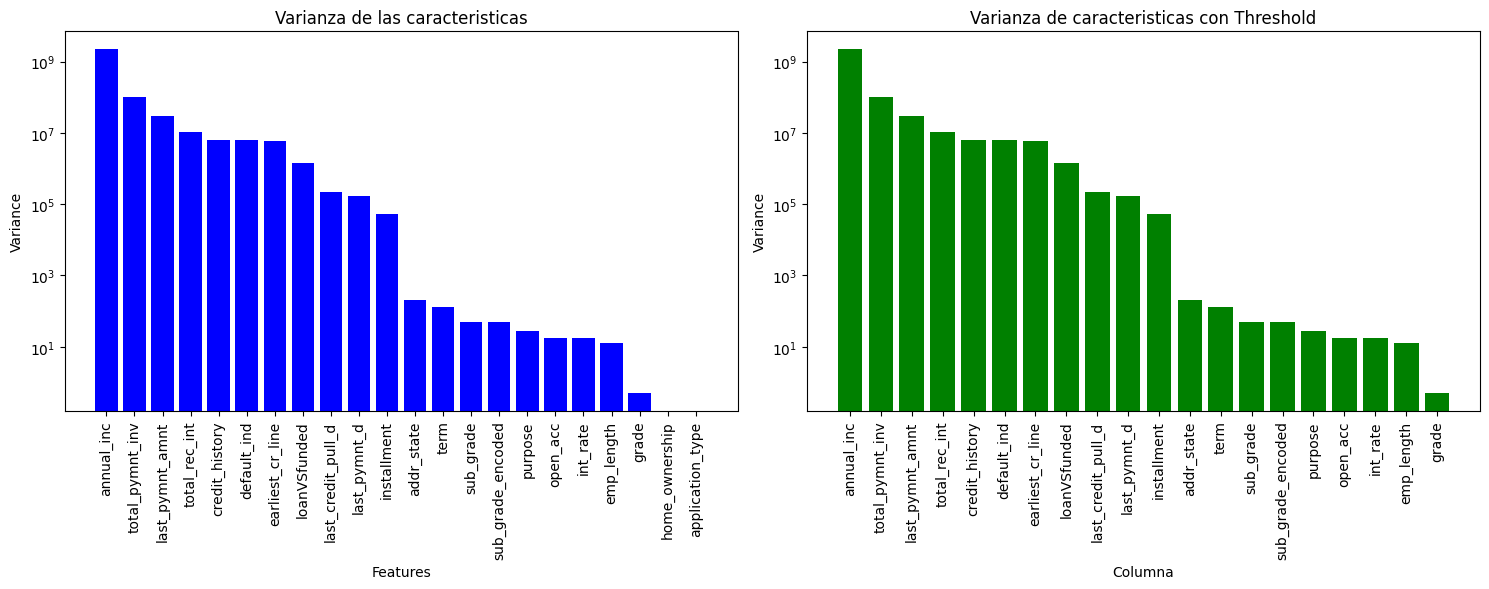

(20, (10101, 20))

In [287]:
# Graficar las varianzas de las características antes de aplicar el umbral
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(features_variances['Columna'], features_variances['Variance'], color='blue')
plt.title('Varianza de las caracteristicas')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.yscale('log')
plt.tight_layout()

# Graficar las varianzas después de aplicar el umbral
selected_features_variances = features_variances[features_variances['Variance'] > threshold]

plt.subplot(1, 2, 2)
plt.bar(selected_features_variances['Columna'], selected_features_variances['Variance'], color='green')
plt.title('Varianza de caracteristicas con Threshold')
plt.xticks(rotation=90)
plt.xlabel('Columna')
plt.ylabel('Variance')
plt.yscale('log')
plt.tight_layout()

plt.show()

# Número de características seleccionadas
num_features_selected = X_selected.shape[1]
num_features_selected, X_selected.shape

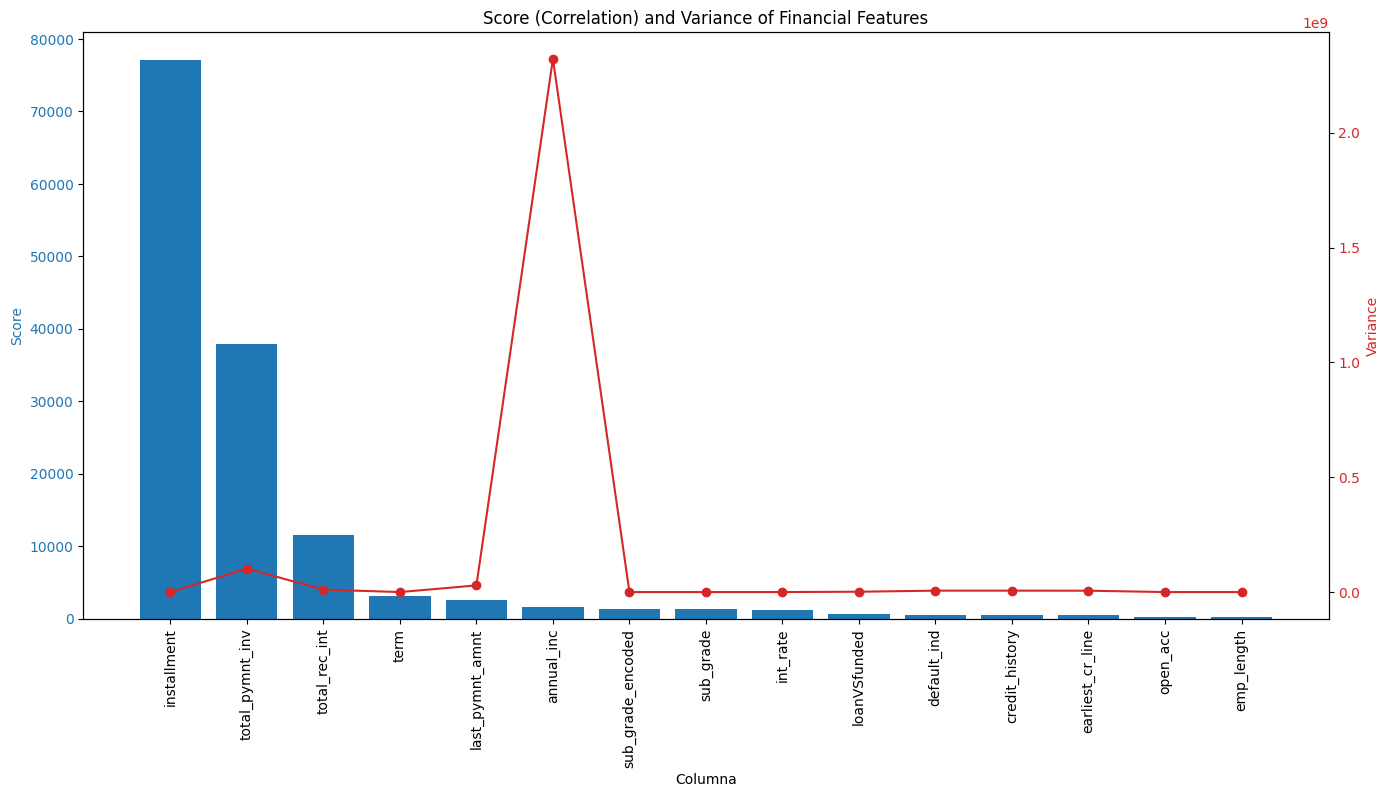

In [288]:
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Columna')
ax1.set_ylabel('Score', color=color)
ax1.bar(df_resultados['Columna'], df_resultados['Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Variance', color=color) 
ax2.plot(df_resultados['Columna'], df_resultados['Variance'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Score (Correlation) and Variance of Financial Features')
plt.show()

Se puede extraer que las características 'installment' y 'total_pymnt_inv' son probablemente las más valiosas para predecir variable objetivo, ya que tienen los puntajes de correlación más altos. Indicando una fuerte relación lineal con la cantidad del préstamo y podrían ser predictores clave en el modelo.

La 'annual_inc' tiene la varianza más alta. Sin embargo, su correlación con la cantidad del préstamo es relativamente baja, lo que indica que por sí sola puede no ser un buen predictor de la cantidad del préstamo. Considerando su alta variabilidad puede contener información útil que podría explotarse de otra manera o en combinación con otras características.

Para finalizar con este metodo se puede apreciar que aplicando el umbral se omiten las variables Home ownership y Application type debido a que estas características no son útiles para el modelo porque no aportan información que pueda ayudar a predecir la variable objetivo.

##### Rige Rregression

Brinda una visión de la importancia de las características teniendo en cuenta la regularización, pero puede sesgar la importancia de características correlacionadas que para evitar esto se contemplaran los resultados de los modelos anteriores

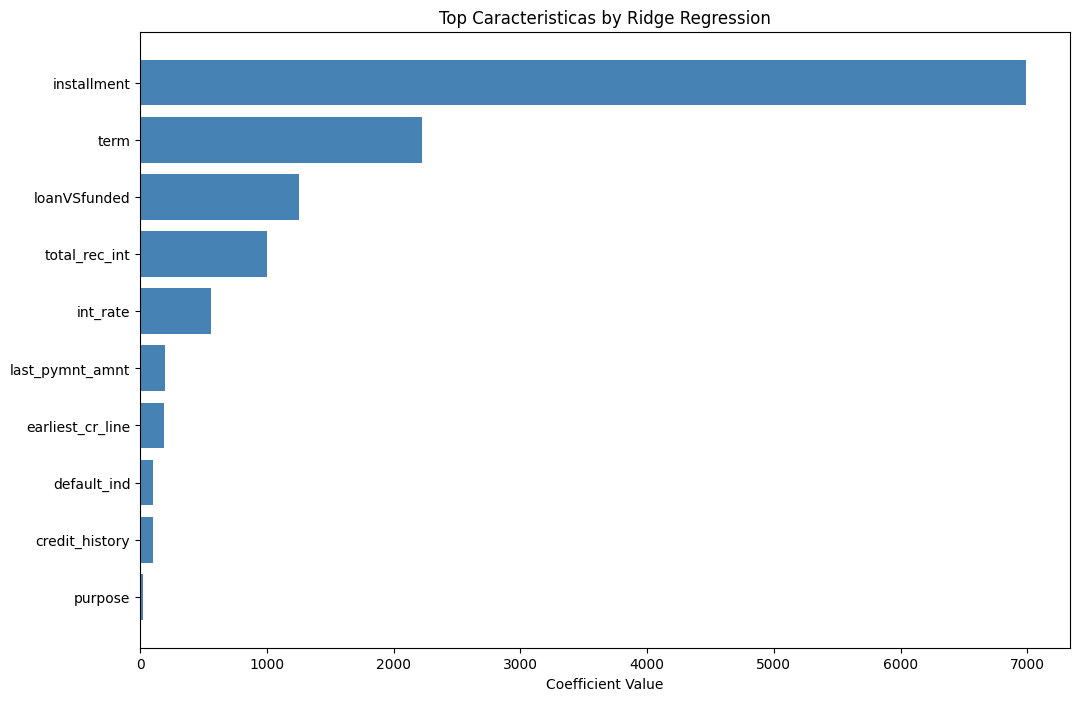

In [299]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Escalar las características ya que los coeficientes de Ridge son sensibles a la escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Inicializar RidgeCV, que incluye la validación cruzada
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))

# Ajustar el modelo
ridge_cv.fit(X_scaled, y) 

# Coef del modelo
ridge_coefs = ridge_cv.coef_ 
coefs_df = pd.DataFrame({'Columna': X_numeric.columns, 'Coefficient': ridge_coefs})
coefs_df = coefs_df.sort_values(by='Coefficient', ascending=False)

# Graficar
plt.figure(figsize=(12, 8))
top_coefs = coefs_df.head(10)  # Ajusta esto para el número de características que deseas mostrar
plt.barh(top_coefs['Columna'], top_coefs['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Top Caracteristicas by Ridge Regression')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la barra más alta esté en la parte superior
plt.show()


In [300]:
df_resultados = pd.merge(df_resultados, coefs_df, on='Columna', suffixes=('score', 'variance', 'Coefficient'))
df_resultados.sort_values(by = 'Coefficient', ascending=False)

,Columna,Score,Variance,Coefficient
0,installment,77071.986985,5.157176e+04,6987.942677
3,term,3132.836389,1.284657e+02,2225.749823
9,loanVSfunded,631.248277,1.461918e+06,1254.934888
2,total_rec_int,11573.916538,1.055939e+07,998.415225
8,int_rate,1201.441424,1.792676e+01,559.849918
4,last_pymnt_amnt,2600.952934,2.893619e+07,195.461074
12,earliest_cr_line,538.572498,5.899048e+06,190.835534
10,default_ind,542.357197,6.152284e+06,105.483286
11,credit_history,542.357197,6.152284e+06,105.483286
1,total_pymnt_inv,37938.163310,1.020657e+08,22.649347


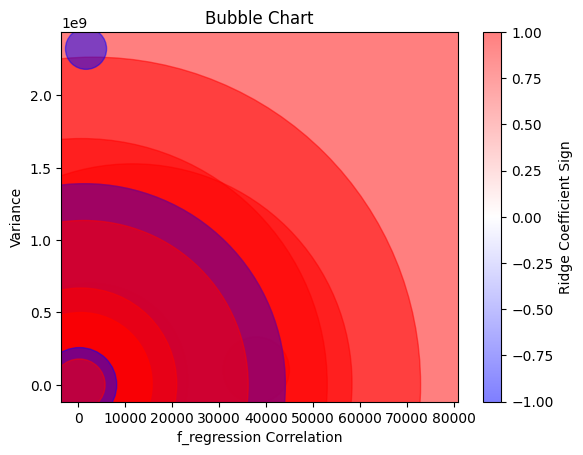

In [303]:
plt.scatter(df_resultados['Score'], df_resultados['Variance'], s=np.abs(df_resultados['Coefficient'])*100, c=np.sign(df_resultados['Coefficient']), cmap='bwr', alpha=0.5)
plt.xlabel('f_regression Correlation')
plt.ylabel('Variance')
plt.title('Bubble Chart')
plt.colorbar(label='Ridge Coefficient Sign')
plt.show()

'Installment' se muestra como un predictor clave, con un coeficiente alto en regresión Ridge y un puntaje elevado en f_regression, subrayando su papel crucial posiblemente debido a su conexión con la estructura de pagos del préstamo. 'Term' y 'loanVSfunded' también son importantes, con coeficientes positivos indicando su relevancia en la predicción. Se me hace interesante resaltar, 'annual_inc' que tiene coeficiente negativo como algunas ptras caracteristicas, lo cual podría reflejar una relación no proporcional o el efecto de la regularización de Ridge, que también ajusta los coeficientes para controlar la multicolinealidad y el sobreajuste, lo que a su vez puede alterar la interpretación de su influencia. 

#### Random Forest.

Este método es bueno para capturar interacciones no lineales y puede manejar relaciones complejas, pero puede ser más computacionalmente intensivo.

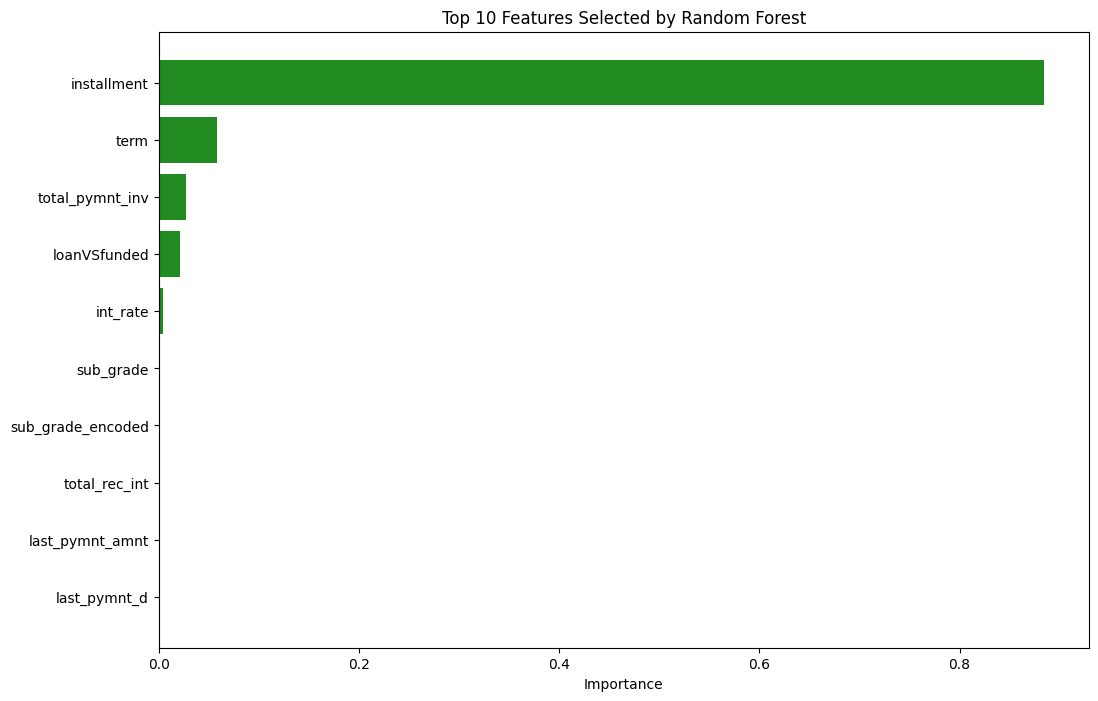

In [304]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Modelo Random Forest
rf = RandomForestRegressor(n_estimators=100)

# Ajustar el modelo a los datos
rf.fit(X_numeric, y)
feature_importances = rf.feature_importances_

# DataFrame para visualizar la importancia de las características
features_df = pd.DataFrame({'Columna': X_numeric.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Graficar
plt.figure(figsize=(12, 8))
plt.barh(features_df['Columna'][:10], features_df['Importance'][:10], color='forestgreen')  # Ajusta el número de características que deseas visualizar
plt.xlabel('Importance')
plt.title('Top 10 Features Selected by Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la barra más alta esté en la parte superior
plt.show()



In [305]:
df_resultados = pd.merge(df_resultados, features_df, on='Columna', suffixes=('score', 'variance', 'Coefficient', 'Importance'))
df_resultados.sort_values(by = 'Importance', ascending=False)

,Columna,Score,Variance,Coefficient,Importance
0,installment,77071.986985,5.157176e+04,6987.942677,0.884730
3,term,3132.836389,1.284657e+02,2225.749823,0.058494
1,total_pymnt_inv,37938.163310,1.020657e+08,22.649347,0.027245
9,loanVSfunded,631.248277,1.461918e+06,1254.934888,0.020823
8,int_rate,1201.441424,1.792676e+01,559.849918,0.004624
7,sub_grade,1283.991015,4.900767e+01,-838.278096,0.001386
6,sub_grade_encoded,1283.991015,4.900767e+01,-838.278096,0.001299
2,total_rec_int,11573.916538,1.055939e+07,998.415225,0.000430
4,last_pymnt_amnt,2600.952934,2.893619e+07,195.461074,0.000152
5,annual_inc,1655.671414,2.321865e+09,-8.755183,0.000144


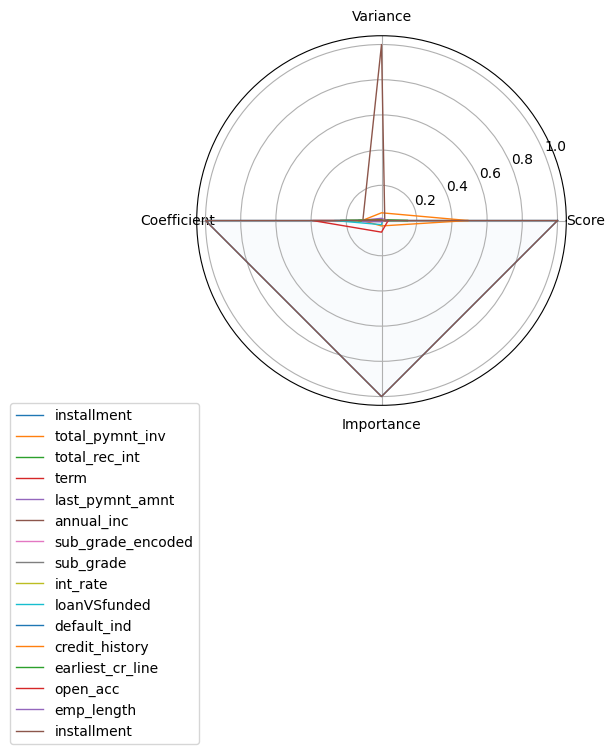

In [306]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Es necesario realizar normalización de los datos para tener todo en una misma escala y poder crear el gráfico
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df_resultados.iloc[:, 1:]), columns=df_resultados.columns[1:])
df_norm['Columna'] = df_resultados['Columna']
df_norm = pd.concat([df_norm, df_norm.iloc[[0]]]).reset_index(drop=True)

# Numero de variables
categorias = list(df_norm)[:-1]
N = len(categorias)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Diagrama de araña
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categorias)
for i, row in df_norm.iterrows():
    values = df_norm.iloc[i].drop('Columna').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=row['Columna'])

# Fill area
ax.fill(angles, values, alpha=0.025)
plt.legend(loc='upper right', bbox_to_anchor=(0.025, 0.025))

plt.show()


In [307]:
df_normalized = pd.concat([df_normalized, df_normalized.iloc[[0]]]).reset_index(drop=True)

En conclusión, la característica 'installment' es la más significativa a lo largo de todos los métodos, mientras que las otras características muestran variaciones en su importancia dependiendo del método de análisis utilizado. Esto subraya la importancia de utilizar múltiples enfoques para la selección de características y la necesidad de interpretar los resultados en el contexto de cada modelo y su aplicación específica.

**Random Forest** parece ser el método más robusto y revelador, ya que captura tanto las relaciones lineales como las no lineales y la importancia de las características más sutiles que pueden ser ignoradas por los otros métodos.